# Exercise - Hyperparameter Tuning with Grid Search

In this exercise you will train a base model and then try to find better combinations of hyperparameter values using the grid search technique.

In [1]:
# DO NOT MODIFY - imports
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Setup

Execute the cells below to read prepared data on the [Invesco QQQ Trust, Series 1 (NASDAQ: QQQ)](https://finance.yahoo.com/quote/QQQ/) ETF from 1999 to 2017. We have already engineered some technical indicators as features and cleaned the data. The DataFrame also includes the raw level of the VIX (Volatility Index).

In [3]:
# DO NOT MODIFY - load data and display basic statistics
df = pd.read_csv("../data/Data.csv")
df.describe()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,target_cls
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6.007000e+03,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,2081.030922,2095.946183,2065.477601,2081.902312,2081.902312,1.393083e+06,2078.749181,2071.905117,30.756276,23.139870,54.158337,4.792468,4.773294,0.232562,0.313135,-0.019477,0.539038
std,1190.533094,1198.235552,1182.804956,1191.233455,1191.233455,7.940254e+05,1186.836845,1177.655332,22.915856,8.233478,11.491627,26.121674,24.413954,0.972663,0.949788,0.999894,0.498515
min,674.750000,694.750000,665.750000,676.000000,676.000000,0.000000e+00,713.458783,762.523796,9.405011,7.844141,14.108149,-229.523401,-195.451431,-1.000000,-1.000000,-1.000000,0.000000
25%,1189.500000,1196.750000,1180.500000,1189.750000,1189.750000,8.021800e+05,1191.495071,1191.046010,16.044542,17.057551,45.910748,-5.746819,-5.215319,-1.000000,-1.000000,-1.000000,0.000000
50%,1505.000000,1512.750000,1492.500000,1505.500000,1505.500000,1.357120e+06,1500.897416,1491.761778,21.749015,21.834960,55.143331,6.466765,6.031173,1.000000,1.000000,-1.000000,1.000000
75%,2741.125000,2759.000000,2720.750000,2744.500000,2744.500000,1.846780e+06,2736.258088,2734.334780,37.591682,28.346199,62.855989,15.941901,15.312192,1.000000,1.000000,1.000000,1.000000
max,5715.000000,5721.250000,5673.000000,5717.250000,5717.250000,6.285917e+06,5642.944495,5547.969757,180.054170,57.964300,88.011433,92.532696,81.935903,1.000000,1.000000,1.000000,1.000000


We'd like to try and predict the direction of 5-day future returns. Run the cell below to split the data and prepare for model training.

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,target_cls
0,2000-11-16,1396.75,1402.75,1376.50,1379.25,1379.25,180156,1396.300225,1402.770723,31.179556,26.944748,41.653459,-4.726233,1.378980,-1,-1,1,0
1,2000-11-17,1378.75,1393.50,1360.25,1370.50,1370.50,90660,1391.609275,1400.688741,31.327445,27.342044,40.051128,-6.469625,-0.190741,-1,-1,1,0
2,2000-11-20,1369.75,1373.50,1345.25,1347.75,1347.75,82907,1383.634861,1397.273338,31.107627,28.056237,36.156663,-9.576616,-2.067916,-1,-1,1,1
3,2000-11-21,1348.25,1362.75,1336.50,1356.00,1356.00,82365,1378.610341,1394.610542,30.760654,28.912117,38.492375,-11.243614,-3.903056,-1,-1,1,0
4,2000-11-22,1356.00,1361.00,1322.00,1323.00,1323.00,76824,1368.499370,1389.990507,31.349179,30.012468,33.251961,-15.054013,-6.133247,-1,-1,1,1


In [6]:
# DO NOT MODIFY - Define features and target and split data
from sklearn.model_selection import train_test_split

# X = df.drop(columns=["fut_ret_5d_is_pos", "Date"])
# y = df["fut_ret_5d_is_pos"]
X = df.drop(columns=["target_cls", "Date"])
y = df["target_cls"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Train a `RandomForestClassifier` and train it using its default hyperparameter values. As this is a tree-based model, you do not need to scale the features.

In [7]:
# DO NOT MODIFY - imports
from sklearn.ensemble import RandomForestClassifier

# FILL IN - Instantiate a RandomForestClassifier and fit it to the training data
# Use random_state=52 for reproducibility
# Set n_jobs=-1 to enable parallel processing using all available CPU cores
clf = RandomForestClassifier(n_jobs=-1, random_state=52)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=52)

We will focus on precision as our performance metric, as we would like to avoid False Positives as much as possible.  
Below, we have provided a function that plots 5-fold cross-validated precision scores. Study it and invoke it to plot the learning curves using the training set. You should be able to observe that the model is overfitting to the training set.

/usr/local/anaconda3/envs/und-ai-trading-strategies-ch6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


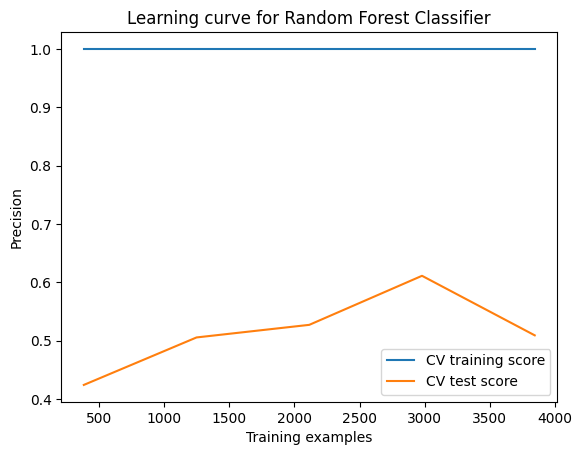

In [10]:
# DO NOT MODIFY - imports
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# DO NOT MODIFY - plotter function
def plot_learning_curve(model, X, y, cv=5, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        scoring="precision",
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label="CV training score")
    plt.plot(train_sizes, test_scores_mean, label="CV test score")
    plt.title("Learning curve for Random Forest Classifier")
    plt.xlabel("Training examples")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


# FILL IN - Plot the learning curve for the RandomForestClassifier using the training data
plot_learning_curve(clf, X_train, y_train)

What was the average cross-validated precision score on the training set?

In [11]:
# DO NOT MODIFY - imports
from sklearn.model_selection import cross_val_score

# FILL IN - Get the 5-fold cross-validated precision of the classifer on the training data
# Use n_jobs=-1 for parallel processing
precision = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1, scoring="precision")
precision.mean()

np.float64(0.5092006872828113)

And how does this score compare to the precision on the test set? - **HINT:** Use the fitted classifier's `predict()` method to get an array of predictions on the test set.

In [12]:
# DO NOT MODIFY - imports
from sklearn.metrics import precision_score

# FILL IN - Get the precision of the classifier on the test data
y_pred = clf.predict(X_test)
precision_score(y_test, y_pred)

np.float64(0.5847457627118644)

Recall that you can use the `get_params()` method of the classifierto see a list of its hyperparameters and other settings.

In [13]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 52,
 'verbose': 0,
 'warm_start': False}

Below, we have picked 3 different values for each of the 4 major hyperparameters of `RandomForestClassifier`. Using Scikit-Learn's `GridSearchCV` class, perform a 5-fold cross-validated grid search using the provided search grid.

In [14]:
# DO NOT MODIFY - imports
from sklearn.model_selection import GridSearchCV

# DO NOT MODIFY - the `hyperspace` of hyperparameters to search
search_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 7, 15],
    'min_samples_leaf': [1, 2, 4]
}

# FILL IN - Instantiate a GridSearchCV object with the fitted RandomForestClassifier, the search grid, 5-fold cross-validation, and precision scoring.
# Fit it to the training data
# Don't forget to set n_jobs=-1 for parallel processing. This may take a minute or two even with parallel processing.
search = GridSearchCV(clf, param_grid=search_grid, n_jobs=-1, cv=5, scoring='precision')
search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=52),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 7, 15],
                         'n_estimators': [50, 100, 200]},
             scoring='precision')

Store the best parameters, best score, and best estimator (model). (These are attributes of `search`.) Feel free to print out the best CV precision score. How does it compare to the base model? Which combination of values yielded this result?

In [16]:
# FILL IN - Get the best parameters, best score, and best estimator from the GridSearchCV object
best_params = search.best_params_
best_score = search.best_score_
best_estimator = search.best_estimator_

In [17]:
best_score

np.float64(0.5293414834081196)

In [18]:
best_params

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 200}

Run the cell below to see the top 5 results in detail.

In [19]:
search_results = pd.DataFrame(search.cv_results_)
search_results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,1.910919,0.085182,0.054228,0.005020,5,2,7,200,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.507653,0.515753,0.536898,0.531818,0.554585,0.529341,0.016465,1
5,1.891793,0.091197,0.055528,0.008854,5,1,7,200,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.508772,0.514689,0.538706,0.532350,0.551282,0.529160,0.015593,2
9,0.323486,0.165490,0.023676,0.004808,5,2,2,50,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.505155,0.509248,0.542827,0.527809,0.554113,0.527830,0.018842,3
17,1.995087,0.081742,0.057022,0.009570,5,2,15,200,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.506918,0.514118,0.538055,0.533708,0.543379,0.527236,0.014173,4
13,0.757173,0.099725,0.030508,0.000826,5,2,7,100,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.507079,0.514586,0.536741,0.530707,0.546512,0.527125,0.014424,5


Re-use the same `plot_learning_curve()` function we provided earlier to plot the learning curve for the best estimator found using training data. How does it compare to the learning curve of the original classifier?

/usr/local/anaconda3/envs/und-ai-trading-strategies-ch6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/und-ai-trading-strategies-ch6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/und-ai-trading-strategies-ch6/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

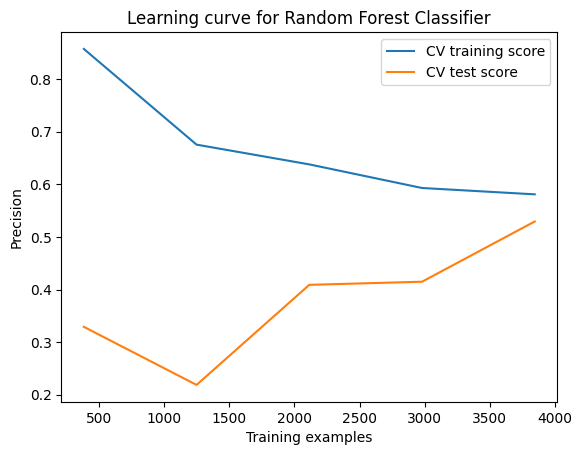

In [20]:
# FILL IN - Plot the learning curve for the best estimator using the training data
plot_learning_curve(best_estimator, X_train, y_train)

And finally, use this estimator to evaluate the test set and get the new test performance score. How does it compare?

In [21]:
# FILL IN - Get the precision of the best model on test data
y_pred = best_estimator.predict(X_test)
precision_score(y_test, y_pred)

np.float64(0.5315568022440392)

---

In [22]:
# FILL IN - Get predictions on the training and test sets
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

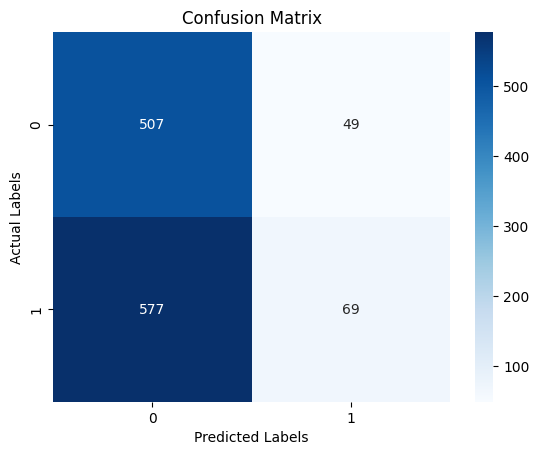

In [23]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")
    plt.show()


plot_confusion_matrix(y_test, y_pred_test)

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[507,  49],
       [577,  69]])